In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.groupby(['Survived']).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


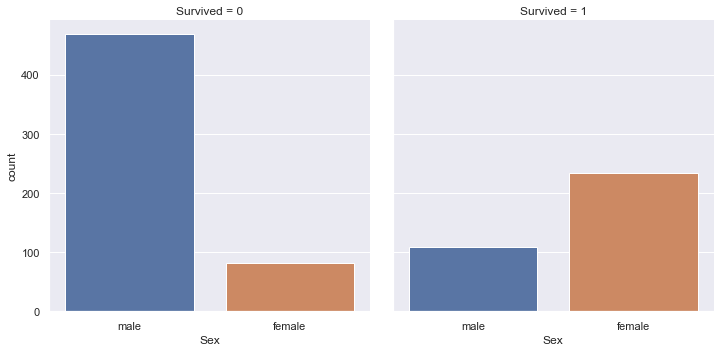

In [13]:
sns.catplot(x='Sex',col='Survived',kind='count',data=df_train)

In [14]:
df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count()

0.18890814558058924

In [15]:
df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count()

0.7420382165605095

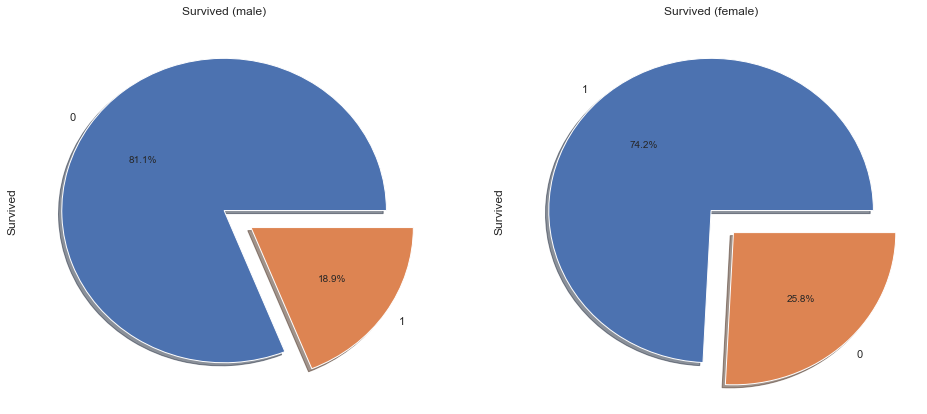

In [31]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [32]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [33]:
print("% of survivals in") 
print("Pclass=1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.62962962963
Pclass=2 :  0.472826086957
Pclass=3 :  0.242362525458


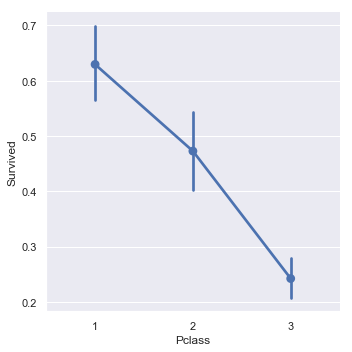

In [34]:
sns.catplot('Pclass','Survived', kind='point', data=df_train);

In [35]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

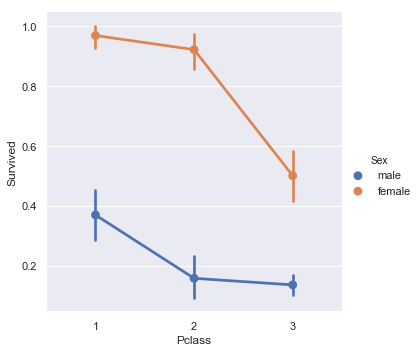

In [36]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df_train);

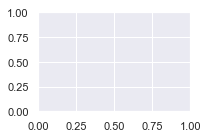

In [19]:
plt.subplot(221)

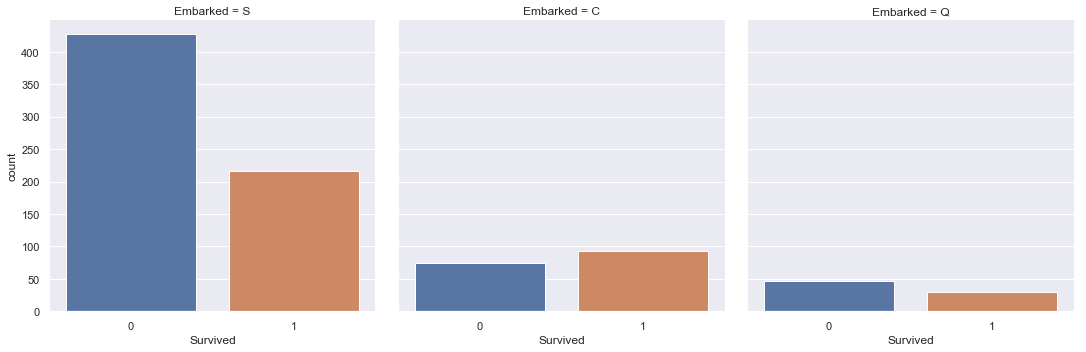

In [38]:
sns.catplot(x='Survived',col='Embarked',kind='count',data=df_train)

In [39]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

In [40]:
#bins
for df in [df_train, df_test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

In [41]:
print(df_train[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


In [42]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [45]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')



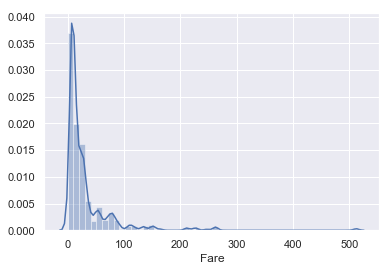

In [47]:
sns.distplot(df_train['Fare']);

In [48]:
for df in [df_train, df_test]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

In [49]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [50]:
#Part 2: Data wrangling

df_train_ml = df_train.copy()
df_test_ml = df_test.copy()